# Predicting Price of Melbourne Housing

I am using the Data of Melbourne Housing to predict the price of house various parameters. The project using various Regression Models to come to a conclusion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### The data

#### Importing the data:

In [2]:
data = pd.read_csv('data\melb_data.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### Explaining the columns in the dataset

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

#### The other variables have common meanings

In [3]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

### Objective: Framing the question

The objective of our project is to predict if and how much the column headings affect the price of Housing in Melbourne.

To get through, first we need to look through the data explore the data

### Exploring the data

In [4]:
data.shape

(13580, 21)

In [5]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [6]:
data.describe(include='all')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,13580,13580,13580.000000,13580,1.358000e+04,13580,13580,13580,13580.000000,13580.000000,...,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,12211,13580.000000,13580.000000,13580,13580.000000
unique,314,13378,NaN,3,NaN,5,268,58,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,53 William St,NaN,h,NaN,S,Nelson,27/05/2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Moreland,NaN,NaN,Southern Metropolitan,NaN
freq,359,3,NaN,9449,NaN,9022,1565,473,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1163,NaN,NaN,4695,NaN
mean,NaN,NaN,2.937997,NaN,1.075684e+06,NaN,NaN,NaN,10.137776,3105.301915,...,1.534242,1.610075,558.416127,151.967650,1964.684217,NaN,-37.809203,144.995216,NaN,7454.417378
std,NaN,NaN,0.955748,NaN,6.393107e+05,NaN,NaN,NaN,5.868725,90.676964,...,0.691712,0.962634,3990.669241,541.014538,37.273762,NaN,0.079260,0.103916,NaN,4378.581772
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,...,0.000000,0.000000,0.000000,0.000000,1196.000000,NaN,-38.182550,144.431810,NaN,249.000000
25%,NaN,NaN,2.000000,NaN,6.500000e+05,NaN,NaN,NaN,6.100000,3044.000000,...,1.000000,1.000000,177.000000,93.000000,1940.000000,NaN,-37.856822,144.929600,NaN,4380.000000
50%,NaN,NaN,3.000000,NaN,9.030000e+05,NaN,NaN,NaN,9.200000,3084.000000,...,1.000000,2.000000,440.000000,126.000000,1970.000000,NaN,-37.802355,145.000100,NaN,6555.000000
75%,NaN,NaN,3.000000,NaN,1.330000e+06,NaN,NaN,NaN,13.000000,3148.000000,...,2.000000,2.000000,651.000000,174.000000,1999.000000,NaN,-37.756400,145.058305,NaN,10331.000000


We can see that Address column has 13378 unique values, so it doesn't make sense to include it in our feature list. We will drop Address column. Further we can see that there are 314 unique values of suburb, and each unique value will have unique Propertycount value. So we will create a different dataFrame for storing that variable and discuss about it later if needed. 

In [7]:
suburb_unique = pd.DataFrame((data.groupby('Suburb')['Propertycount'].max()))

suburb_unique

,Propertycount
Suburb,
Abbotsford,4019.0
Aberfeldie,1543.0
Airport West,3464.0
Albanvale,1899.0
Albert Park,3280.0
...,...
Wonga Park,1328.0
Wyndham Vale,5262.0
Yallambie,1369.0


In [8]:
data.drop(columns=['Address','Propertycount'],axis=1,inplace=True)

In [9]:
data.isna().sum()

Suburb             0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car               62
Landsize           0
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
Lattitude          0
Longtitude         0
Regionname         0
dtype: int64

We can see that we need to first deal with columns Car, BuildingArea, YearBuilt and CouncilArea. Lets first look for Car column

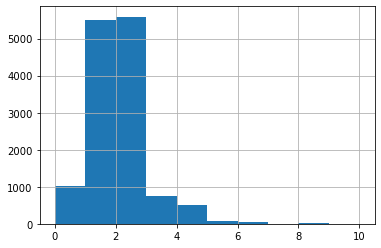

count    13518.000000
mean         1.610075
std          0.962634
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: Car, dtype: float64


In [10]:
data['Car'].hist()
plt.show()
print(data['Car'].describe())

We can see that median value is 2. Moreover mean is 1.6 which is near to 2. So we will replace the null values with 2.

In [11]:
data['Car'].fillna(2,inplace=True)

In [12]:
data.isna().sum()

Suburb             0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
Lattitude          0
Longtitude         0
Regionname         0
dtype: int64

In [13]:
data['BuildingArea'].describe()

count     7130.000000
mean       151.967650
std        541.014538
min          0.000000
25%         93.000000
50%        126.000000
75%        174.000000
max      44515.000000
Name: BuildingArea, dtype: float64

We can see that we have a large data with NAN values in BuildingArea. As buildingArea is an important factor but at the same time half of the values are missing, we will drop the column

In [14]:
data.drop(columns='BuildingArea',axis=1, inplace = True)

We will do the same for YearBuilt column because we have large data missing for the column

In [15]:
data.drop(columns='YearBuilt',axis=1, inplace = True)

For the column CouncilArea, we have 1359 rows with NA values. We can't drop these columns becase we have already dropped two columns with relevant data. Instead, as CouncilArea is defined by specific area, we can assign CouncilArea to unkown rows using latitude and longtitude. For example, CounilArea A will be applicable for range of Latitude and Longtitude, say Lat 39.4 to 39.7 and Long 144.5 to 144.9

We can first group CouncilArea for available data using mean values of Lattitude and Longtitude

Then we can find the Euclidean distance between the Lat and Long value of unknown row and mean value of Lat and Long for known CouncilAreas. Then we can assign the value of Minimum distance CouncilArea as CouncilArea for unknown row.

**Note-** As the process using loop inside loop, the time complexity of loop is O(n^2). For large data set this might not be an optimal solution

In [16]:
mean_latlong = data.groupby('CouncilArea').mean()[['Lattitude','Longtitude']]
mean_latlong.reset_index(inplace=True)

In [17]:
council_empty = data[data['CouncilArea'].isna()]

In [18]:
council_empty.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname
7584,Brighton East,3,h,1270000.0,VB,Ray,20/05/2017,10.7,3187.0,3.0,1.0,3.0,724.0,NaN,-37.92910,145.02970,Southern Metropolitan
10797,Reservoir,3,h,526250.0,SP,Barry,8/07/2017,12.0,3073.0,3.0,1.0,1.0,308.0,NaN,-37.72828,145.03033,Northern Metropolitan
12213,Aberfeldie,4,h,1436000.0,S,Brad,3/09/2017,7.5,3040.0,4.0,3.0,3.0,511.0,NaN,-37.75788,144.90487,Western Metropolitan
12214,Albion,5,h,905000.0,S,hockingstuart,3/09/2017,10.5,3020.0,5.0,2.0,3.0,732.0,NaN,-37.78345,144.82295,Western Metropolitan
12215,Alphington,4,h,1680000.0,S,Love,3/09/2017,5.7,3078.0,4.0,3.0,2.0,720.0,NaN,-37.77928,145.02993,Northern Metropolitan


In [20]:
final_council = []
for index, row in council_empty.iterrows():
    point1 = np.array((row['Lattitude'], row['Longtitude']))
    dists = []
    for index2, row2 in mean_latlong.iterrows():
        point2 = np.array((row2['Lattitude'], row2['Longtitude']))
        dist  = np.linalg.norm(point1 - point2)
        dists.append(dist)
    min_index = dists.index(min(dists))
    final_council.append(mean_latlong.iloc[min_index,0])

council_empty.loc[:,('CouncilArea')] = final_council

In [21]:
council_empty.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname
7584,Brighton East,3,h,1270000.0,VB,Ray,20/05/2017,10.7,3187.0,3.0,1.0,3.0,724.0,Bayside,-37.92910,145.02970,Southern Metropolitan
10797,Reservoir,3,h,526250.0,SP,Barry,8/07/2017,12.0,3073.0,3.0,1.0,1.0,308.0,Darebin,-37.72828,145.03033,Northern Metropolitan
12213,Aberfeldie,4,h,1436000.0,S,Brad,3/09/2017,7.5,3040.0,4.0,3.0,3.0,511.0,Moonee Valley,-37.75788,144.90487,Western Metropolitan
12214,Albion,5,h,905000.0,S,hockingstuart,3/09/2017,10.5,3020.0,5.0,2.0,3.0,732.0,Brimbank,-37.78345,144.82295,Western Metropolitan
12215,Alphington,4,h,1680000.0,S,Love,3/09/2017,5.7,3078.0,4.0,3.0,2.0,720.0,Darebin,-37.77928,145.02993,Northern Metropolitan


In [22]:
data[data['CouncilArea'].isna()] = council_empty

In [23]:
data.isna().sum()

Suburb         0
Rooms          0
Type           0
Price          0
Method         0
SellerG        0
Date           0
Distance       0
Postcode       0
Bedroom2       0
Bathroom       0
Car            0
Landsize       0
CouncilArea    0
Lattitude      0
Longtitude     0
Regionname     0
dtype: int64

Now we have data without any missing values. Now lets explore the data with various plots and processing data wherever necessary

First of all, we know that number of Rooms cannot be less than number of bedrooms in a house. So find that and drop those values because they are outliers

In [24]:
data[data['Bedroom2']>data['Rooms']]

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname
6,Abbotsford,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,Yarra,-37.80240,144.99930,Northern Metropolitan
9,Abbotsford,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,3.0,1.0,2.0,220.0,Yarra,-37.80100,144.99890,Northern Metropolitan
63,Airport West,4,h,773000.0,S,Brad,17/09/2016,13.5,3042.0,5.0,3.0,4.0,531.0,Moonee Valley,-37.72630,144.86790,Western Metropolitan
207,Altona North,3,h,620000.0,SP,Hunter,22/08/2016,11.1,3025.0,5.0,2.0,2.0,276.0,Hobsons Bay,-37.82620,144.84430,Western Metropolitan
233,Armadale,2,u,3625000.0,S,Jellis,4/06/2016,6.3,3143.0,3.0,2.0,2.0,0.0,Stonnington,-37.85550,145.02910,Southern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11536,Watsonia North,3,h,740000.0,SP,Barry,15/07/2017,14.5,3087.0,4.0,1.0,2.0,909.0,Banyule,-37.70255,145.08578,Northern Metropolitan
11579,Aspendale,3,h,970000.0,VB,hockingstuart,22/07/2017,21.5,3195.0,4.0,2.0,2.0,612.0,Kingston,-38.01596,145.09932,South-Eastern Metropolitan
11846,Toorak,1,u,350000.0,VB,Marshall,22/07/2017,4.1,3142.0,2.0,1.0,1.0,0.0,Stonnington,-37.84157,145.00469,Southern Metropolitan
12411,Thornbury,3,h,1375000.0,S,McGrath,3/09/2017,7.0,3071.0,4.0,2.0,3.0,530.0,Darebin,-37.75968,145.02305,Northern Metropolitan


In [25]:
data.drop(data[data['Bedroom2']>data['Rooms']].index,inplace=True)

Lets look at the scatter plot between different columns and price

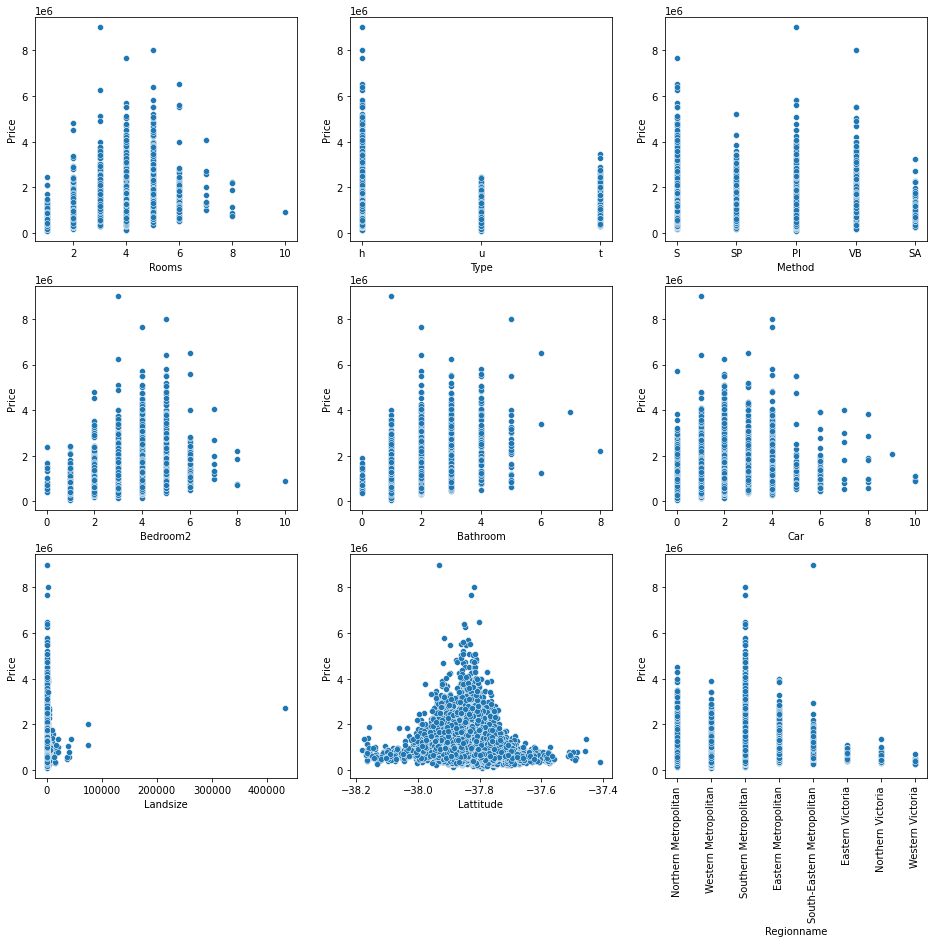

In [26]:
plt.figure(figsize=(16,14))
for index, row in zip(range(9),['Rooms','Type','Method','Bedroom2','Bathroom','Car','Landsize','Lattitude','Regionname']):
    sns.scatterplot(x=row,y='Price',data=data,ax=plt.subplot(3,3,index+1))
    if(row=='Regionname'):
        plt.xticks(rotation=90)

First lets look at Landsize column as we can see a lot of skewness in the chart.

In [27]:
data_temp = data[data['Landsize']>25000]
data_temp

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname
687,Balwyn North,3,h,2000000.0,VB,Kay,28/08/2016,9.2,3104.0,3.0,1.0,2.0,75100.0,Boroondara,-37.80020,145.07000,Southern Metropolitan
3942,Maribyrnong,2,u,495000.0,S,Brad,18/03/2017,8.7,3032.0,2.0,2.0,2.0,37000.0,Maribyrnong,-37.77520,144.89250,Western Metropolitan
5194,Reservoir,3,h,572000.0,S,Ray,23/04/2016,11.2,3073.0,3.0,1.0,2.0,41400.0,Darebin,-37.71040,145.02570,Northern Metropolitan
9223,Maribyrnong,2,u,585000.0,S,Brad,3/06/2017,4.3,3032.0,2.0,2.0,2.0,37000.0,Maribyrnong,-37.77518,144.89254,Western Metropolitan
10045,Silvan,4,h,1070000.0,S,Ray,24/06/2017,34.6,3795.0,4.0,2.0,3.0,38490.0,Yarra Ranges,-37.83229,145.43003,Eastern Victoria
10504,Silvan,3,h,1085000.0,S,Harcourts,27/05/2017,34.6,3795.0,3.0,2.0,2.0,76000.0,Yarra Ranges,-37.84739,145.47052,Eastern Victoria
11020,Fitzroy,3,h,2700000.0,VB,Kay,12/08/2017,2.1,3065.0,3.0,3.0,1.0,433014.0,Yarra,-37.79751,144.98309,Northern Metropolitan
11371,Gisborne,4,h,807000.0,S,Raine,15/07/2017,45.9,3437.0,4.0,2.0,3.0,40468.0,Macedon Ranges,-37.50929,144.56444,Northern Victoria
13245,New Gisborne,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,5.0,3.0,5.0,44500.0,Macedon Ranges,-37.45392,144.58864,Northern Victoria


We can see that the data is an outlier as the price is too low for the Landsize. Lets visualize this to prove this

<AxesSubplot:xlabel='Landsize', ylabel='Price'>

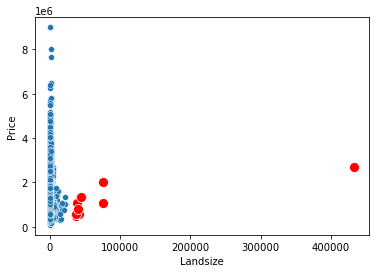

In [28]:
sns.scatterplot(x='Landsize',y='Price',data=data)
sns.scatterplot(x='Landsize',y='Price',data=data_temp,marker='o',s=100,color='r')

We should drop these rows as:

1. The data is an outlier
2. We can see there are many values with Landsize as 0 which is not possible so we need to replace those variables with mean value. For having better mean value, we need to remove the outlier

In [29]:
data.drop(data[(data['Landsize']>25000)].index, inplace=True)

In [30]:
data.drop(data[data['Landsize']==0].index)['Landsize'].mean()

582.2247818499127

In [31]:
data['Landsize'] = data['Landsize'].replace(0,data.drop(data[data['Landsize']==0].index)['Landsize'].mean())

#### From the above data we can visualize the following outliers:
1. Room size greater than 7
2. Bedroom2 with values greater than 6
2. Bedroom2 with value 2 and price greater than 4000000
2. Bathroom with values greater than 5
3. Car with values greater than 6
4. Landsize with values greater than 10000
5. "South-Eastern Metropolitan" RegionName with Price greater than 7000000
6. "Southern Metropolitan" RegionName with Price greater than 5000000

I have commented out the lines that I tried for an outlier but commented them later because they weren't outlier

We should remove these values as they can prove to be a outlier

In [32]:
data.drop(data[data['Rooms']>7].index, inplace = True)
# data.drop(data[(data['Rooms']==4) & (data['Price']>7000000)].index, inplace = True)
# data.drop(data[(data['Rooms']==3) & (data['Price']>6000000)].index, inplace = True)
# data.drop(data[(data['Rooms']==6) & (data['Price']>4000000)].index, inplace = True)
# data.drop(data[(data['Rooms']==7) & (data['Price']>3500000)].index, inplace = True)
# data.drop(data[(data['Type']=='h') & (data['Price']>8000000)].index, inplace = True)
# data.drop(data[(data['Method']=="PI") & (data['Price']>6000000)].index, inplace = True)
# data.drop(data[(data['Method']=="VB") & (data['Price']>6000000)].index, inplace = True)
# data.drop(data[(data['Method']=="S") & (data['Price']>7000000)].index, inplace = True)
data.drop(data[(data['Bedroom2']>6)].index, inplace = True)
data.drop(data[(data['Bedroom2']==2) & (data['Price']>4000000)].index, inplace = True)
data.drop(data[(data['Bathroom']>5)].index, inplace = True)
data.drop(data[(data['Car']>6)].index, inplace = True)
data.drop(data[(data['Landsize']>10000)].index, inplace = True)
data.drop(data[(data['Regionname']=="South-Eastern Metropolitan") & (data['Price']>7000000)].index, inplace = True)
data.drop(data[(data['Regionname']=="Southern Metropolitan") & (data['Price']>4500000)].index, inplace = True)

Let us visualize the data both with Scatter plot and Histogram

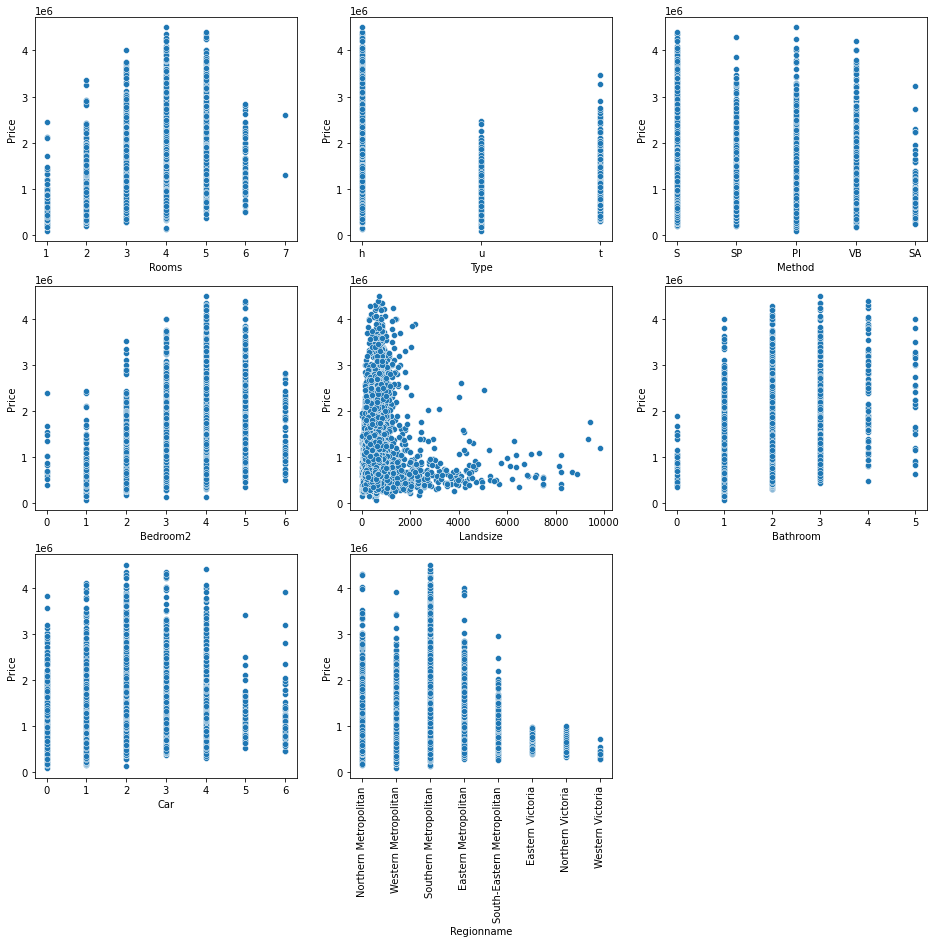

In [33]:
plt.figure(figsize=(16,14))
for index, row in zip(range(9),['Rooms','Type','Method','Bedroom2','Landsize','Bathroom','Car','Regionname']):
    sns.scatterplot(x=row,y='Price',data=data,ax=plt.subplot(3,3,index+1))
    if(row=='Regionname'):
        plt.xticks(rotation=90)

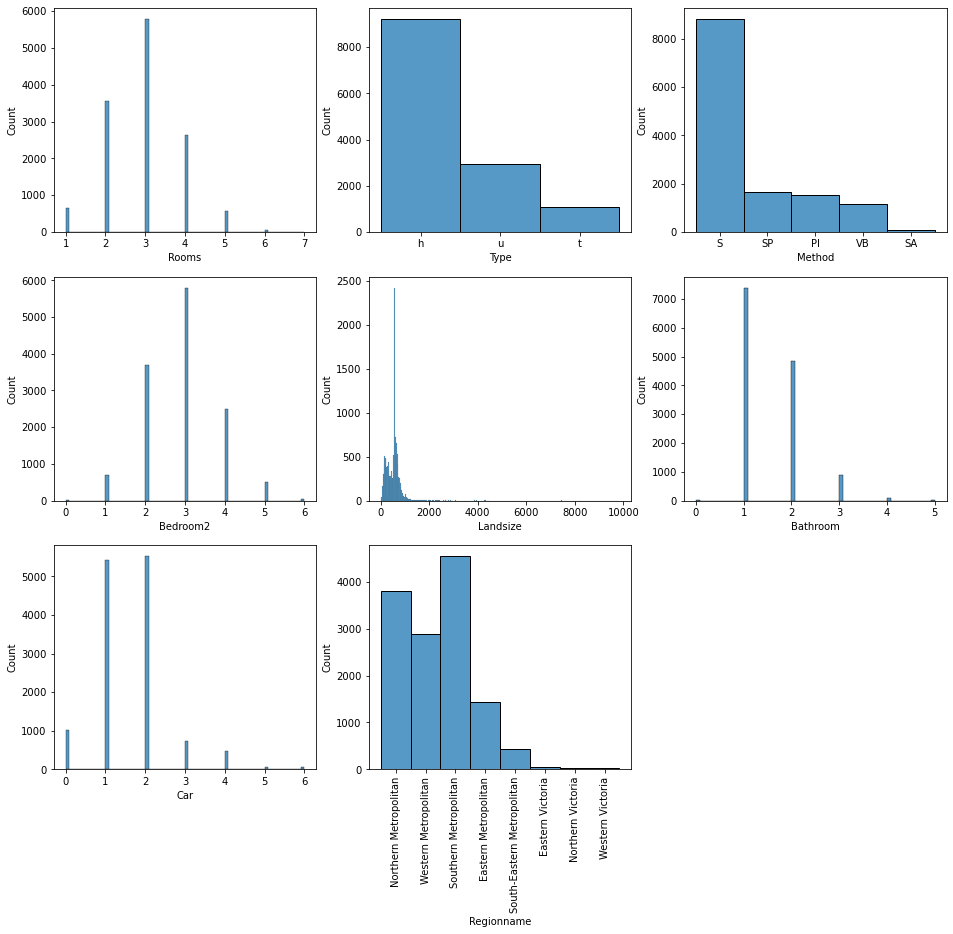

In [34]:
plt.figure(figsize=(16,14))
for index, row in zip(range(9),['Rooms','Type','Method','Bedroom2','Landsize','Bathroom','Car','Regionname']):
    sns.histplot(x=row,data=data,ax=plt.subplot(3,3,index+1))
    if(row=='Regionname'):
        plt.xticks(rotation=90)

We can see that column Landsize is highly skewed. First let us see the skewness

In [35]:
data['Landsize'].skew()

7.6292435968760985

To remove the skewness, we will use the log values of the data

In [36]:
data['Landsize']=np.log(data['Landsize'])

<AxesSubplot:xlabel='Landsize', ylabel='Count'>

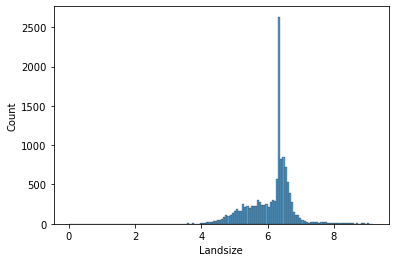

In [37]:
sns.histplot(x=(data['Landsize']))

In [38]:
data['Landsize'].skew()

-0.594090337164312

We have decreased the Skewness from 7.6 to -0.6.

In [39]:
data.shape

(13279, 17)

### Preparing the data

In [40]:
data.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname'],
      dtype='object')

In [41]:
features = data[['Suburb','Rooms','Type','SellerG','Distance','Postcode','Bedroom2','Bathroom','Car',
                 'Landsize','CouncilArea','Lattitude','Longtitude','Regionname']]

#### As we are using Regression Model, we cannot use catregorical values as it is. We need to either use One hot encoding or we can use Label Encoding. As we have large number of independent variables and each have many unique variable, using one hot encoding could not be possible. Therefore we will use Label Encoding. Label Encoding can make the data bias but it is the only optimal solution to use with Regression Model

In [42]:
from sklearn import preprocessing
suburb_encoder = preprocessing.LabelEncoder()
type_encoder = preprocessing.LabelEncoder()
# method_encoder = preprocessing.LabelEncoder()
sellerg_encoder = preprocessing.LabelEncoder()
council_encoder = preprocessing.LabelEncoder()
regionname_encoder = preprocessing.LabelEncoder()


In [44]:
features['suburb_encoded'] = suburb_encoder.fit_transform(features['Suburb'])
features['type_encoded'] = type_encoder.fit_transform(features['Type'])
# features['method_encoded'] = method_encoder.fit_transform(features['Method'])
features['sellerg_encoded'] = sellerg_encoder.fit_transform(features['SellerG'])
features['council_encoded'] = council_encoder.fit_transform(features['CouncilArea'])
features['regionname_encoded'] = regionname_encoder.fit_transform(features['Regionname'])

We don't need the encoded columns anymore so we will drop these variables

In [45]:
features.drop(columns=['Suburb','Type','SellerG','CouncilArea','Regionname'],axis=1, inplace=True)

In [46]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13279 entries, 0 to 13579
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rooms               13279 non-null  int64  
 1   Distance            13279 non-null  float64
 2   Postcode            13279 non-null  float64
 3   Bedroom2            13279 non-null  float64
 4   Bathroom            13279 non-null  float64
 5   Car                 13279 non-null  float64
 6   Landsize            13279 non-null  float64
 7   Lattitude           13279 non-null  float64
 8   Longtitude          13279 non-null  float64
 9   suburb_encoded      13279 non-null  int32  
 10  type_encoded        13279 non-null  int32  
 11  sellerg_encoded     13279 non-null  int32  
 12  council_encoded     13279 non-null  int32  
 13  regionname_encoded  13279 non-null  int32  
dtypes: float64(8), int32(5), int64(1)
memory usage: 1.3 MB


In [47]:
X = features
X.shape

(13279, 14)

In [48]:
y = data['Price']
len(y)
y.shape

(13279,)

As we are using Linear Model, we need need to use normalization else our model will not work properly.

In [49]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

### Modeling data

First let us use Multiple Regression

#### Multiple Regression

In [51]:
from sklearn import linear_model
multiple_reg = linear_model.LinearRegression()
multiple_reg.fit(x_train,y_train)

LinearRegression()

In [52]:
print("Score of Multiple Regression :",multiple_reg.score(x_test,y_test))

Score of Multiple Regression : 0.6176488354788054


We can see that the score of Multiple Regression is not great. So let us use Polynomial Regression and fist find the optimal degree. 

**Note-** We cannot use high number of degree as we have large number of independent variables and it will not be optimal to calculate the values

#### Polynomial Regression

In [53]:
from sklearn.preprocessing import PolynomialFeatures
r_squares = []
lr = linear_model.LinearRegression()
for n in range(1,5):
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    lr.fit(x_train_pr,y_train)
    r_squares.append(lr.score(x_test_pr,y_test))


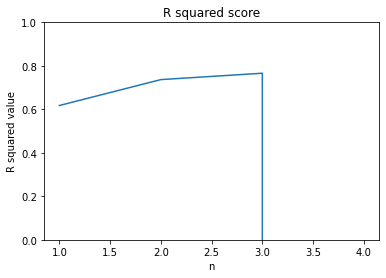

In [54]:
plt.plot(range(1,5),r_squares)
plt.title("R squared score")
plt.xlabel("n")
plt.ylabel("R squared value")
plt.ylim(0,1)
plt.show()

We can see that our R^2 value increases till n = 3 and then decreases dramatically. For our model, Polynomial Regression Model with degree 3 gives best score

In [55]:
max(r_squares)

0.7660597215542349

In [56]:
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
lr.fit(x_train_pr,y_train)

LinearRegression()

As our Polynomial Regression Model gave an accuracy of 0.766, it performed better than Multiple Regression model.

Till now we have have got our best model with r squared score of 0.766. Now one thing to note is our data has many number of features, and many features are correlated to each other. For example, Rooms and bedrooms could be correlated as the number of bedrooms increase, naturally the number of rooms will increase. Similary there could be many such correlated features. This could cause Overfitting of our model which could give innacurate predictions. To overcome this, we could use Ridge Regression or Lasso Regression. They can not only remove the factor of overfitting but also improve our model accuracy to some extent.

#### Ridge Regression

To use Ridge Regression, we need to specify the value of aplha. We will use GridSearchCV to not only generalize our accuracy with cross validation but also find the best estimator of alpha.

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
RidgeModel = Ridge()
par = [{'alpha':[0.1,1,10,100,1000,10000,100000,1000000]}]
Grid1 = GridSearchCV(RidgeModel, par, cv =4)
Grid1.fit(x_train_pr,y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

In [58]:
RR = Grid1.best_estimator_
print(RR)
print(RR.score(x_train_pr,y_train))
RR.score(x_test_pr,y_test)

Ridge(alpha=100)
0.8075994672964744


0.7700328619492762

From Ridge Regression, we are improving our model accuracy from 0.766 to 0.770. For our training data we get an accuracy of 0.807 but for for test data we get only 0.770

Although this is not too much of improvement, but we are removing the possible chance of overfitting of data. 


#### Lasso Regression

In [59]:
print("The number of columns in our train data: ",x_train_pr.shape[1])

The number of columns in our train data:  680


From previous Ridge Regression we have removed the possible chance of overfitting of data. But, as we have used a polynomial Transfrom of degree 5, our data with 680 different coeficients. As the number is very large, we need to have a feature selection method. Lasso Regression does it successfully.

Here also we will use GridSearchCV to find best possible value of alpha and use cross validation.

Running Lasso Model takes several minutes

In [63]:
from sklearn.linear_model import Lasso
LassoModel = Lasso()
Grid2 = GridSearchCV(LassoModel,par,cv=4)
Grid2.fit(x_train_pr,y_train)

C:\Users\MAYANK RAJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223887349948936.94, tolerance: 240583583668.9818
  model = cd_fast.enet_coordinate_descent(
C:\Users\MAYANK RAJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223597340978857.88, tolerance: 242573711673.2748
  model = cd_fast.enet_coordinate_descent(
C:\Users\MAYANK RAJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226336533540274.34, tolerance: 245625834472.52432
  model = cd_fast.enet_coordinate_descent(
C:\Users\MAYANK RAJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid=[{'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

In [64]:
LR = Grid2.best_estimator_
print(LR)
print(LR.score(x_train_pr,y_train))
LR.score(x_test_pr,y_test)

Lasso(alpha=1000)
0.7994083847932286


0.7732457010561116

In [65]:
coeff_used = np.sum(LR.coef_!=0)
print("Number of features used :",coeff_used)

Number of features used : 400


From Lasso Regression Model we find an accuracy of 0.773 for test data and 0.799 for our train data. 

Although we have just improved our accuracy from 0.770 in Ridge Regression to 0.773 in Lasso Regression, we have achieved feature selection to better fit our data. We have just used 400 coeficients of our 680 coeficients. This can be a better model for our data. 

### Model Evaluation

We will use R squared value and mean squared error to check if our model is good fit.

In [66]:
from sklearn.metrics import mean_squared_error as mse
print("The R squared value for our multiple regression model is ",multiple_reg.score(x_test,y_test))
print("The Mean squared error for our multiple regression model is ",mse(y_test, multiple_reg.predict(x_test)))
print('\n')
print("The R squared value for our Polynomial regression model with degree 3 is ", lr.score(x_test_pr,y_test))
print("The Mean squared error for our Polynomial regression model with degree 3 is ",mse(y_test, lr.predict(x_test_pr)))
print('\n')
print("The R squared value for our Ridge regression model with polynomial features degree 3 on is ", RR.score(x_test_pr,y_test))
print("The Mean squared error for our Ridge regression model with Polynomial regression model with degree 3 is ",\
      mse(y_test, RR.predict(x_test_pr)))
print('\n')
print("The R squared value for our Lasso regression model with polynomial features degree 3 is ", LR.score(x_test_pr,y_test))
print("The Mean squared error for our Lasso regression model with Polynomial regression model with degree 3 is ",\
      mse(y_test, LR.predict(x_test_pr)))

The R squared value for our multiple regression model is  0.6176488354788054
The Mean squared error for our multiple regression model is  140597700231.08633


The R squared value for our Polynomial regression model with degree 3 is  0.7660597215542349
The Mean squared error for our Polynomial regression model with degree 3 is  86024231630.32188


The R squared value for our Ridge regression model with polynomial features degree 3 on is  0.7700328619492762
The Mean squared error for our Ridge regression model with Polynomial regression model with degree 3 is  84563233328.04767


The R squared value for our Lasso regression model with polynomial features degree 3 is  0.7732457010561116
The Mean squared error for our Lasso regression model with Polynomial regression model with degree 3 is  83381812080.909


Although we can clearly say that our Lasso Regression model is better than all three models, the value of Mean Squared error is very high which could be decreased further with different models.

We could plot a scatter plot between the original and predicted value of our test data set to understand where our model fails

In [67]:
yhat = pd.DataFrame(LR.predict(x_test_pr),columns=['Price'])

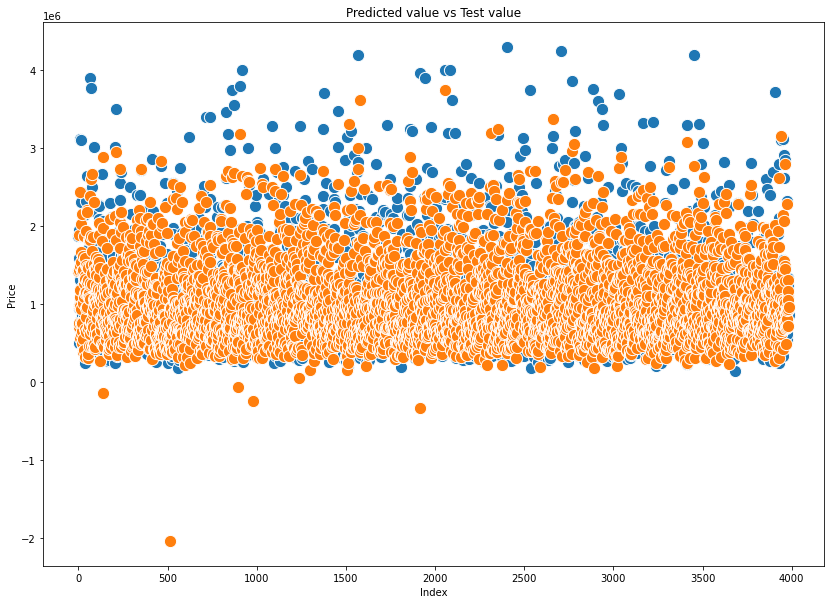

In [68]:
plt.figure(figsize=(14,10))
sns.scatterplot(x=range(len(y_test)),y='Price',data=pd.DataFrame(y_test),s=150)
sns.scatterplot(x=range(len(y_test)),y='Price',data=yhat,alpha=1,s=150)
plt.title("Predicted value vs Test value")
plt.xlabel('Index')
plt.show()

From the graph above, we can see that the area where blue markers are visible are the prices for which our model did not perform well. Further we can see that our model predicts negative value of price, which is also wrong. 

#### Our model can be termed more accurate if it predicts the positive price below 2000000.

To prove that our model does not have high error for accurate values, we will plot a histogram for absolute error values for predicted and real test values

<AxesSubplot:xlabel='Price', ylabel='Count'>

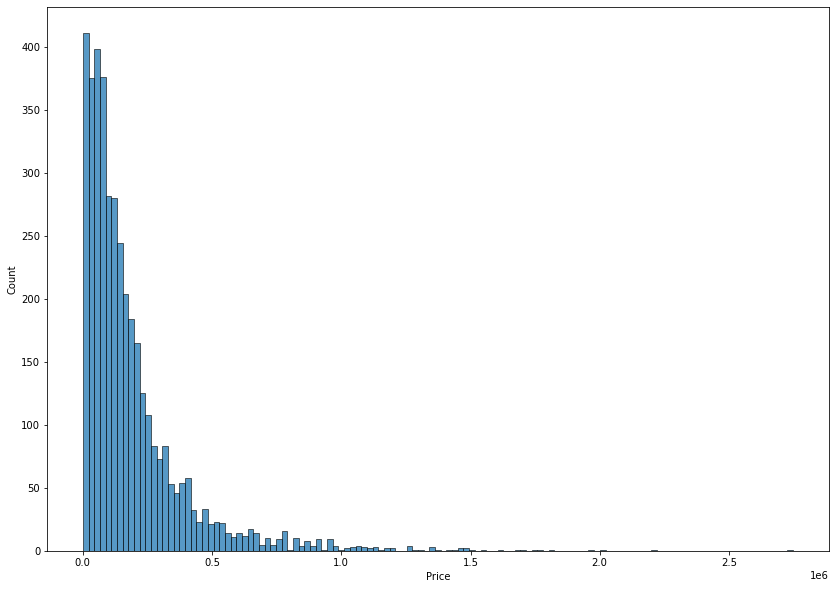

In [69]:
plt.figure(figsize=(14,10))
defects = abs(y_test - yhat.values.reshape(-1))
sns.histplot(x=defects)

From the histogram we can prove that our model works good for low value of price as the absolute error is less for large number of samples.


**Note-** We can't improve our model further with these features as we don't have enough number of sample data for high house prices. We can get more accurate results if we drop few features or if we use different models.

### Prediction with our model

Let us predict price of house in Melbourne using our model. For let us try some random numbers

Let us generate 10 random data in the range of the data we already have

In [70]:
size = 10
trial_suburb = list(suburb_encoder.inverse_transform(list(np.random.randint(0,312,size))))
trial_type = list(type_encoder.inverse_transform(list(np.random.randint(0,3,size))))
trial_sellerg = list(sellerg_encoder.inverse_transform(list(np.random.randint(0,265,size))))
trial_council = list(council_encoder.inverse_transform(list(np.random.randint(0,33,size))))
trial_regionname = list(regionname_encoder.inverse_transform(list(np.random.randint(0,8,size))))


trial_rooms = list(np.random.randint(1,10,size))
trial_distance = list(np.random.uniform(0,25.157685,size))
trial_postcode = list(np.random.randint(3000,3078,size))
trial_bedroom2 = list(np.random.randint(0,10,size))
trial_bathroom = list(np.random.randint(0,10,size))
trial_car = list(np.random.randint(0,10,size))
trial_landsize = list(np.random.uniform(0,10.106271,size))
trial_lattitude = list(np.random.uniform(-38.182550,-36.408530,size))
trial_longtitude = list(np.random.uniform(144.431810, 145.526350, size))
trial_suburb_encoded = suburb_encoder.transform(trial_suburb)
trial_type_encoded = type_encoder.transform(trial_type)
trial_sellerg_encoded = sellerg_encoder.transform(trial_sellerg)
trial_council_encoded = council_encoder.transform(trial_council)
trial_regionname_encoded = regionname_encoder.transform(trial_regionname)

trial_data = pd.DataFrame(list(zip(trial_rooms,trial_distance,trial_postcode,trial_bedroom2,\
                                   trial_bathroom,trial_car,trial_landsize,trial_lattitude, \
                                   trial_longtitude,trial_suburb_encoded,trial_type_encoded,\
                                  trial_sellerg_encoded,trial_council_encoded, trial_regionname_encoded\
                                  ,trial_suburb,trial_type,trial_sellerg,trial_council,trial_regionname)),\
                         columns=['Rooms','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize',\
                                 'Lattitude','Longtitude','Suburb_encoded','Type_encoded','SellerG_encoded',\
                                  'Council_encoded','Regionname_encoded','Suburb','Type','SellerG','Council','Regionname'])

First let us view our trial data

In [71]:
trial_data

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Suburb_encoded,Type_encoded,SellerG_encoded,Council_encoded,Regionname_encoded,Suburb,Type,SellerG,Council,Regionname
0,8,15.079937,3035,2,7,3,5.213194,-37.112406,144.541518,253,1,56,11,3,Skye,t,D'Aprano,Hume,Northern Victoria
1,9,18.475390,3052,7,7,8,9.458374,-37.543794,144.633338,222,0,43,4,1,Oakleigh South,h,Chambers,Cardinia,Eastern Victoria
2,9,3.757588,3004,2,0,6,0.666237,-36.981797,144.886006,50,1,179,19,2,Bullengarook,t,Prime,Melton,Northern Metropolitan
3,7,9.404633,3068,2,0,3,4.044229,-36.645191,144.620805,231,2,81,12,4,Port Melbourne,u,Gary,Kingston,South-Eastern Metropolitan
4,3,18.026090,3019,1,0,0,8.461468,-37.915971,145.117536,226,0,83,23,6,Parkdale,h,Grantham,Moreland,Western Metropolitan
5,8,12.854626,3061,0,4,3,6.218286,-36.922849,144.976726,16,1,148,7,2,Aspendale Gardens,t,Moonee,Frankston,Northern Metropolitan
6,1,9.994791,3012,0,6,9,9.922428,-37.158886,144.692867,175,0,58,25,1,Kingsbury,h,Darras,Port Phillip,Eastern Victoria
7,5,3.822156,3077,3,8,7,3.141045,-37.292762,145.143471,104,1,165,12,1,Doncaster East,t,Only,Kingston,Eastern Victoria
8,2,7.927780,3048,1,7,4,6.745522,-37.790099,144.823443,257,1,14,10,7,South Yarra,t,Australian,Hobsons Bay,Western Victoria
9,6,22.064327,3038,2,3,7,6.465244,-37.998898,145.465365,107,2,57,29,4,Doveton,u,Daniel,Whittlesea,South-Eastern Metropolitan


Although we have both label encoded and text value both present in our trial set, we will drop the text values and further process it the same way we did it for our main data

In [72]:
feature_trial = trial_data.drop(columns=['Suburb','Type','SellerG','Council','Regionname'])
feature_trial

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Suburb_encoded,Type_encoded,SellerG_encoded,Council_encoded,Regionname_encoded
0,8,15.079937,3035,2,7,3,5.213194,-37.112406,144.541518,253,1,56,11,3
1,9,18.475390,3052,7,7,8,9.458374,-37.543794,144.633338,222,0,43,4,1
2,9,3.757588,3004,2,0,6,0.666237,-36.981797,144.886006,50,1,179,19,2
3,7,9.404633,3068,2,0,3,4.044229,-36.645191,144.620805,231,2,81,12,4
4,3,18.026090,3019,1,0,0,8.461468,-37.915971,145.117536,226,0,83,23,6
5,8,12.854626,3061,0,4,3,6.218286,-36.922849,144.976726,16,1,148,7,2
6,1,9.994791,3012,0,6,9,9.922428,-37.158886,144.692867,175,0,58,25,1
7,5,3.822156,3077,3,8,7,3.141045,-37.292762,145.143471,104,1,165,12,1
8,2,7.927780,3048,1,7,4,6.745522,-37.790099,144.823443,257,1,14,10,7
9,6,22.064327,3038,2,3,7,6.465244,-37.998898,145.465365,107,2,57,29,4


In [73]:
X_trial = feature_trial
X_trial = preprocessing.StandardScaler().fit(X_trial).transform(X_trial)

In [74]:
X_trial_pr = pr.fit_transform(X_trial)

In [75]:
y_hat_trial = pd.DataFrame(LR.predict(X_trial_pr).astype(int),columns=['Price_Predicted'])
y_hat_trial

,Price_Predicted
0,831588
1,1778777
2,811022
3,744635
4,1303094
5,929679
6,1373044
7,1276176
8,994152
9,795670


We have predicted our price for houses with random data. Let us merge it with our trial_data to view it more easily

In [76]:
trial_data_final = pd.concat([trial_data,y_hat_trial],axis=1)

In [77]:
trial_data_final

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Suburb_encoded,Type_encoded,SellerG_encoded,Council_encoded,Regionname_encoded,Suburb,Type,SellerG,Council,Regionname,Price_Predicted
0,8,15.079937,3035,2,7,3,5.213194,-37.112406,144.541518,253,1,56,11,3,Skye,t,D'Aprano,Hume,Northern Victoria,831588
1,9,18.475390,3052,7,7,8,9.458374,-37.543794,144.633338,222,0,43,4,1,Oakleigh South,h,Chambers,Cardinia,Eastern Victoria,1778777
2,9,3.757588,3004,2,0,6,0.666237,-36.981797,144.886006,50,1,179,19,2,Bullengarook,t,Prime,Melton,Northern Metropolitan,811022
3,7,9.404633,3068,2,0,3,4.044229,-36.645191,144.620805,231,2,81,12,4,Port Melbourne,u,Gary,Kingston,South-Eastern Metropolitan,744635
4,3,18.026090,3019,1,0,0,8.461468,-37.915971,145.117536,226,0,83,23,6,Parkdale,h,Grantham,Moreland,Western Metropolitan,1303094
5,8,12.854626,3061,0,4,3,6.218286,-36.922849,144.976726,16,1,148,7,2,Aspendale Gardens,t,Moonee,Frankston,Northern Metropolitan,929679
6,1,9.994791,3012,0,6,9,9.922428,-37.158886,144.692867,175,0,58,25,1,Kingsbury,h,Darras,Port Phillip,Eastern Victoria,1373044
7,5,3.822156,3077,3,8,7,3.141045,-37.292762,145.143471,104,1,165,12,1,Doncaster East,t,Only,Kingston,Eastern Victoria,1276176
8,2,7.927780,3048,1,7,4,6.745522,-37.790099,144.823443,257,1,14,10,7,South Yarra,t,Australian,Hobsons Bay,Western Victoria,994152
9,6,22.064327,3038,2,3,7,6.465244,-37.998898,145.465365,107,2,57,29,4,Doveton,u,Daniel,Whittlesea,South-Eastern Metropolitan,795670
